# EDA

## Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import datetime
from category_encoders import TargetEncoder

In [2]:
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
sales_train = pd.read_csv('data/sales_train.csv')
test = pd.read_csv('data/test.csv')

## item_categories

In [3]:
item_categories.info()
item_categories.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
list(item_categories.item_category_name.values)

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

The table ***item_categories*** contains all categories of all items. There are 84 categories of items. The table has 2 features.  
___________________
**item_category_id** *(unique)*  
It is the identifier of item category.
___________________
**item_category_name**  
It is the name of category. Almost all category names have the same pattern **'\[more general category\] - \[category\]'**. So it is possible to split these categories into two: super category and simple category.

## items

In [5]:
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


The table ***items*** contains information about items. There are 22170 items. The table has 3 features.  
____________________
**item_id** *(unique)*  
It is the identifier of item.
____________________
**item_name**  
It is the name of item.
____________________
**item_category_id**  
It is the id of item category. The information about item categories is in the table ***item_categories***. If the item categories are splitted into two other features, it will affect this table.

In [6]:
list(items.item_name.sample(100))

['ТЕМНЫЙ РЫЦАРЬ: ВОЗРОЖДЕНИЕ ЛЕГЕНДЫ. ЧАСТЬ 1 м/ф  (регион)',
 'Футболка Call Of Duty Ghost Skull M',
 'NAZARETH  Rock`N`Roll Telephone  2LP',
 'Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 y Ren D P [PC, Цифровая верс',
 'ВИСОКОСНЫЙ ГОД  Который возвращается',
 'Копия The Lone Ranger Tonto Crow Headdress',
 'FIFA 14. Ultimate Edition (с поддержкой PS Move) [PS3, русская версия]',
 'Открытка Код 53 (5) (в ассортименте)',
 'ПРИКЛЮЧЕНИЯ МИШЕК ГАММИ-3',
 'КОРОЛЬ ЛЕВ (регион)',
 'СКАЗКИ ЭДУАРДА УСПЕНСКОГО (Выпуск 3)',
 'Самые увлекательные игры. Пробуждение. Заколдованный замок [PC, Jewel]',
 'Need for Speed Rivals [Xbox 360, русская версия]',
 'KEYS ALICIA  Girl On Fire',
 'СЕРОВ АЛЕКСАНДР  Сказочный Версаль',
 'Л.К. ФРЭНК КАПРА',
 'Футболка Starcraft II HOTS Kerrigan черная S',
 'ДРУГОЙ МИР: ВОССТАНИЕ ЛИКАНОВ / ДРАКУЛА (BD)',
 'Sid Meier’s Civilization V',
 'ДРЕВО ЖИЗНИ',
 'Forza Horizon [Xbox 360]',
 'ВЕСЕЛЫЕ РЕБЯТА  Ретроспектива (фирм.)',
 'ГАРРИ ПОТТЕР И ПРИНЦ

It is the random sample of item names. There is no any common patterns. Moreover the amount of such names is 22170 which is very large. So I will ignore this feature.

## shops

In [7]:
shops.info()
shops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


The table ***shops*** contains all shops. There are 60 shops. The table has 2 features.  
___________________
**shop_id** *(unique)*  
It is the identifier of shop.
___________________
**shop_name**  
It is the name of shop. Almost all the shop names has the same pattern **'\[the name of city\] \[the type of shop\] \[the name or address of shop\]'**. So it is possible to split this feature into three: city, the type of shop and the name of shop.

## sales_train

In [8]:
sales_train.info()
sales_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


The table ***sales_train*** contains the info about sellings of items in shops from January 2013 to October 2015. It contains 2,935,849 rows. The table has several features.  
_________________________

**date**  
It is the date of selling. It ranges from 01.01.2013 to 31.10.2015. As the task is to predict the selling count in the next month this feature is useless. If every month contained the integer count of weeks, it could be used for training models on weekly data.
_________________________

**date_block_num**  
It is the number of months from January 2013. It ranges from 0 to 33. For rows with the target month this feature equals 34. This feature is categorical and ordered.
_________________________

**shop_id**  
It is the id of shop that sold the item. All info about shops is in table ***shops***. As table ***shops*** will be changed because of splitting the **shop_name** attribute this info can be written in this table.
_________________________

**item_id**  
It is the id of item that was sold. All info about items is in table ***items***. As item info will be changed because of changing the ***item_categories*** table this info can be written in this table.
_________________________

**item_price**  
The price of item in the shop at this day. It can be different for different shops and days.
_________________________

**item_cnt_day** *(target)*  
The count of items sold by the shop at this day. 

String representations of all the months

In [9]:
all_month_names = [datetime.datetime(2013 + i // 12, i % 12 + 1, 1).strftime('%B, %Y') for i in range(34)]
all_months = pd.DataFrame({'date_block_num': list(range(34))})

The function to research if all the feature values are present in column.

In [10]:
def all_feature_values(df, feature_df, feature_name):
    return feature_df[feature_name].isin(df[feature_name]).all()

In [11]:
all_feature_values(
    sales_train.merge(items, on='item_id'),
    item_categories,
    'item_category_id'
)

True

In [12]:
all_feature_values(
    test.merge(items, on='item_id'),
    item_categories,
    'item_category_id'
)

False

The ***sales_train*** table contains all the ids of item categories.

In [13]:
all_feature_values(
    sales_train,
    shops,
    'shop_id'
)

True

In [14]:
all_feature_values(test, shops, 'shop_id')

False

The ***sales_train*** table contains all the ids of shops.

In [15]:
all_feature_values(
    sales_train,
    items,
    'item_id'
)

False

In [16]:
all_feature_values(
    test,
    items,
    'item_id'
)

False

In [17]:
all_feature_values(
    pd.concat([sales_train[['item_id']], test[['item_id']]], ignore_index=True),
    items,
    'item_id'
)

True

The ***sales_train*** table doesn't contain all the ids of items but the union with the ***test*** table contains.

So not all items are present in the train dataset. It is not very big problem because all the item categories are present in this table. The item category is more significant than item name. So when splitting item categories into other ones all of them will be present in the train dataset.

There is one row where *item_price* is negative

In [18]:
sales_train.item_price[sales_train.item_price <= 0]

484683   -1.0
Name: item_price, dtype: float64

The *item_id* of this item is 2973. But in other rows *item_price* is at least 1049.

The table with rows where *item_id* is 2973 and sorted by *item_price*:

In [19]:
min_price_item_id = sales_train.loc[484683].item_id
sales_train[sales_train.item_id == min_price_item_id].drop(484683).item_price.describe()

count     779.000000
mean     2044.249392
std       580.046592
min      1049.000000
25%      1249.500000
50%      2499.000000
75%      2499.000000
max      2499.000000
Name: item_price, dtype: float64

The row with *item_price* -1 contains *shop_id* equals 32 and *item_id* equals 2973.

The table with rows where *shop_id* equals 32 and *item_id* equals 2973.

In [20]:
sales_train[(sales_train.item_id == min_price_item_id) & (sales_train.shop_id == 32)].drop(484683).item_price.describe()

count      12.000000
mean     2290.708333
std       486.464539
min      1249.000000
25%      2499.000000
50%      2499.000000
75%      2499.000000
max      2499.000000
Name: item_price, dtype: float64

The prices of this item in this shop are at least 1249.0. So this negative price can be the input error and will be ignored.

Mean price among all shops and items:

In [21]:
prices = sales_train.groupby(['shop_id', 'item_id']).item_price.mean()

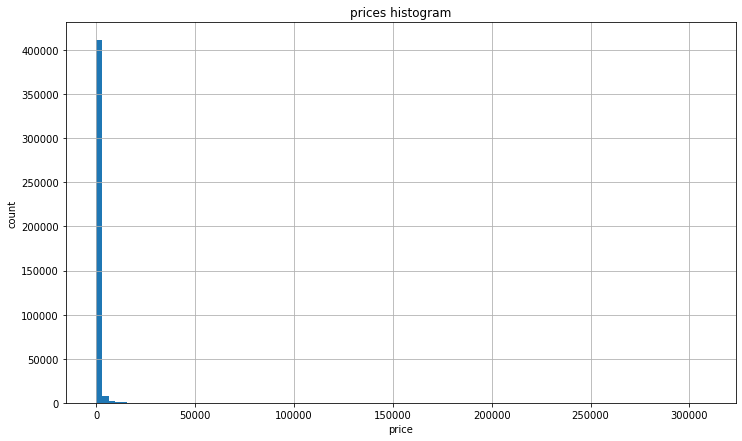

In [22]:
prices.hist(bins=100, figsize=(12, 7))
plt.xlabel('price')
plt.ylabel('count')
plt.title('prices histogram')
plt.show()

Almost all prices are less 50000.

Sorted prices:

In [23]:
prices.sort_values()

shop_id  item_id
58       11865           0.090000
         20146           0.095833
6        11864           0.096667
         11872           0.096667
16       20144           0.100000
                        ...      
3        13403       42990.000000
22       13403       42990.000000
12       7241        49782.000000
25       13199       50999.000000
12       6066       307980.000000
Name: item_price, Length: 424124, dtype: float64

As we can see there are a few extremely large prices.

Percentiles of prices

In [24]:
percents = np.append(np.linspace(0.5, 5, 10), np.linspace(95, 99.5, 10))
{f'{key} %': value for key, value in zip(percents, np.percentile(prices, percents))}

{'0.5 %': 28.0,
 '1.0 %': 50.0,
 '1.5 %': 58.0,
 '2.0 %': 69.0,
 '2.5 %': 76.0,
 '3.0 %': 80.0,
 '3.5 %': 96.86150000000004,
 '4.0 %': 98.0,
 '4.5 %': 99.0,
 '5.0 %': 99.41227272727285,
 '95.0 %': 2499.0,
 '95.5 %': 2599.0,
 '96.0 %': 2799.0,
 '96.5 %': 2999.0,
 '97.0 %': 3176.3243380952376,
 '97.5 %': 3499.0,
 '98.0 %': 3999.0,
 '98.5 %': 4999.0,
 '99.0 %': 7998.0,
 '99.5 %': 12741.537083333362}

The most expensive items are:

In [25]:
items.loc[6066]

item_name           Radmin 3  - 522 лиц.
item_id                             6066
item_category_id                      75
Name: 6066, dtype: object

In [26]:
sales_train[sales_train.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [27]:
items.loc[7241]

item_name           UserGate Proxy & Firewall 6.X с модулем фильтр...
item_id                                                          7241
item_category_id                                                   75
Name: 7241, dtype: object

In [28]:
sales_train[sales_train.item_id == 7241]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2327159,29.01.2015,24,12,7241,49782.0,1.0


In [29]:
items.loc[13199]

item_name           Коллекционные шахматы (Властелин Колец)
item_id                                               13199
item_category_id                                         69
Name: 13199, dtype: object

In [30]:
sales_train[sales_train.item_id == 13199]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1488135,20.03.2014,14,25,13199,50999.0,1.0


In [31]:
items.loc[13403]

item_name           Комплект "Microsoft Xbox One 1TB  Limited Edit...
item_id                                                         13403
item_category_id                                                   16
Name: 13403, dtype: object

In [32]:
sales_train[sales_train.item_id == 13403]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2885692,23.10.2015,33,42,13403,42990.0,1.0
2885693,25.10.2015,33,42,13403,28992.0,1.0
2885694,29.10.2015,33,42,13403,37991.0,2.0
2890617,26.10.2015,33,31,13403,35991.0,1.0
2893100,20.10.2015,33,38,13403,41990.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0
2910156,29.10.2015,33,12,13403,42990.0,1.0
2913267,22.10.2015,33,18,13403,41990.0,1.0
2917760,20.10.2015,33,3,13403,42990.0,1.0
2927572,22.10.2015,33,28,13403,40991.0,1.0


First three items were being sold only once. According to their names the prices are not outliers: first one is some software for the group of people, the second one is the rare good, the third one is just an expensive good. The last item is in multiple rows. So these outliers are not errors.

The cheapest item is:

In [33]:
items.loc[11865]

item_name           Змей МАКС антистресс 33 см.
item_id                                   11865
item_category_id                             63
Name: 11865, dtype: object

In [34]:
sales_train[sales_train.item_id == 11865]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
6664,02.01.2013,0,25,11865,729.0,1.0
8753,09.01.2013,0,22,11865,510.0,1.0
38033,14.01.2013,0,0,11865,335.0,1.0
50478,08.01.2013,0,18,11865,510.0,1.0
71636,05.01.2013,0,31,11865,510.3,1.0
...,...,...,...,...,...,...
1736918,11.06.2014,17,19,11865,58.0,1.0
1756736,28.06.2014,17,51,11865,55.0,2.0
1756746,07.06.2014,17,51,11865,55.0,1.0
1775143,09.06.2014,17,31,11865,58.0,1.0


There are many rows corresponding to this item.  
The histogram of its prices in different shops and different months:

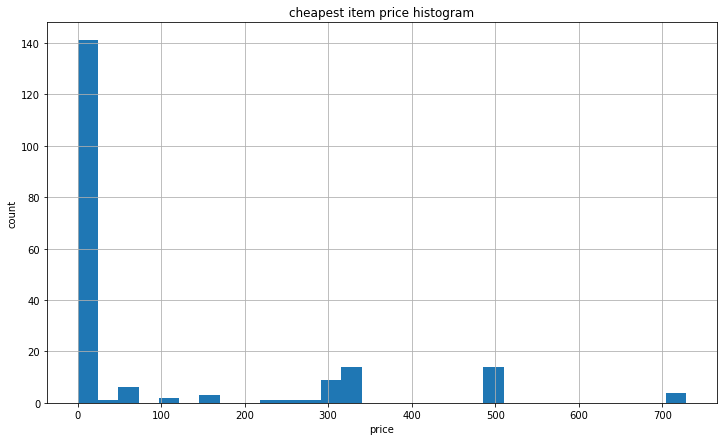

In [35]:
sales_train[sales_train.item_id == 11865].item_price.hist(bins=30, figsize=(12, 7))
plt.xlabel('price')
plt.ylabel('count')
plt.title('cheapest item price histogram')
plt.show()

For this item the scatter of prices is wide including the low prices. So it's not an input error.

There is a small part of items which price is extremely large. It should be considered when working with models that are sensitive to outliers, e.g. linear regression, support vector regressor, k-neighbors regressor. The rows with such values can be removed. Also these values can be clipped using interval (0, 5000).

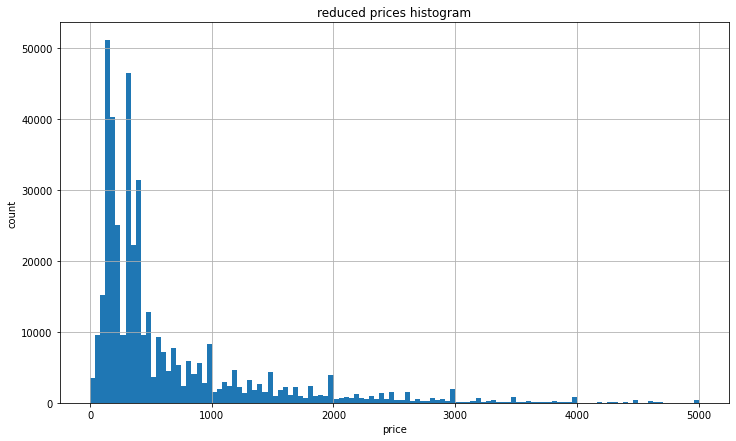

In [36]:
prices[prices <= 5000].hist(bins=120, figsize=(12, 7))
plt.xlabel('price')
plt.ylabel('count')
plt.title('reduced prices histogram')
plt.show()

Every item was being sold during some time interval.  
Info about start and end selling month:

In [37]:
sales_interval = sales_train.groupby(['shop_id', 'item_id']).agg({
    'date_block_num': ['max', 'min']
}).set_axis(['max_date', 'min_date'], axis=1)
sales_interval['date_interval'] = sales_interval['max_date'] - sales_interval['min_date'] + 1

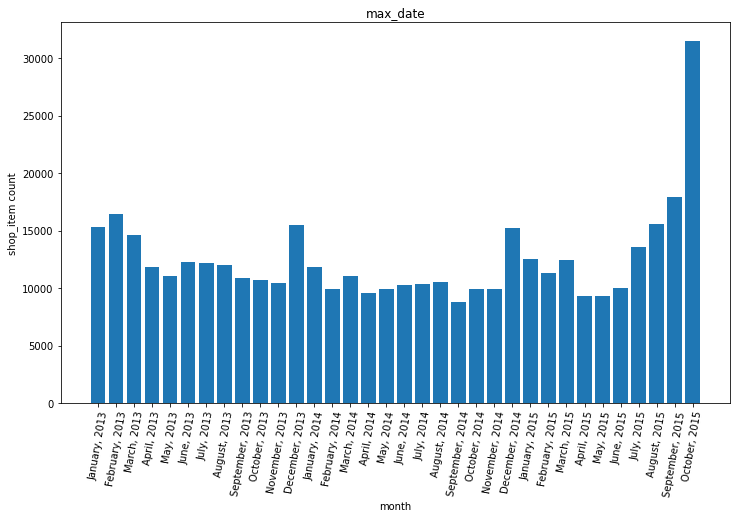

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=all_months.date_block_num, height=sales_interval.groupby('max_date').date_interval.count())
ax.set_xticks(ticks=all_months.date_block_num)
ax.set_xticklabels(all_month_names, rotation=80)
ax.set_xlabel('month')
ax.set_ylabel('shop_item count')
ax.set_title('max_date')
plt.show()

So there is a small part of "shop_items" for that *max_date* is the last month. "shop_items" with small *max_date* have small possibility to be sold. And the amount of such "shop_items" is big.

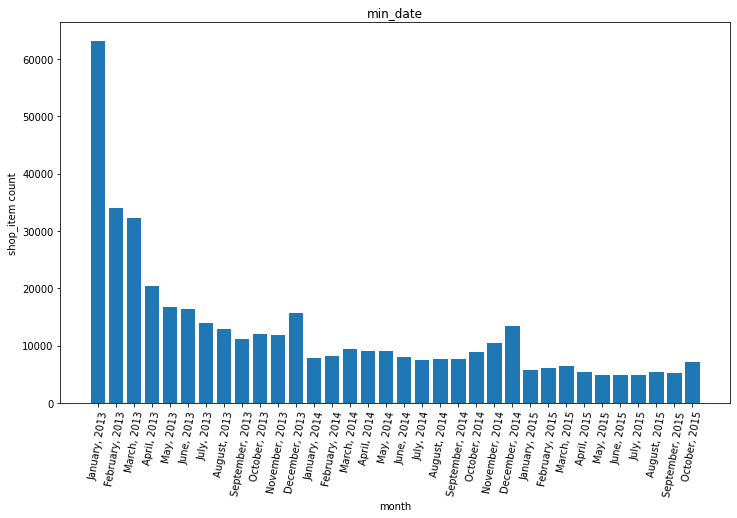

In [39]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=all_months.date_block_num, height=sales_interval.groupby('min_date').date_interval.count())
ax.set_xticks(ticks=all_months.date_block_num)
ax.set_xticklabels(all_month_names, rotation=80)
ax.set_xlabel('month')
ax.set_ylabel('shop_item count')
ax.set_title('min_date')
plt.show()

Also there are many "shop_items" that started to be sold not at the beginning of all the time interval.

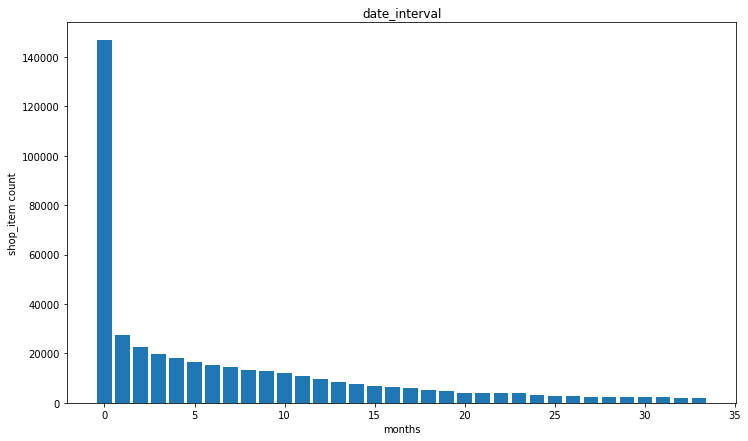

In [40]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=all_months.date_block_num, height=sales_interval.groupby('date_interval').date_interval.count())
ax.set_xlabel('months')
ax.set_ylabel('shop_item count')
ax.set_title('date_interval')
plt.show()

About 143518/417004 = 34.416% of all "shop_items" were being sold only for a month

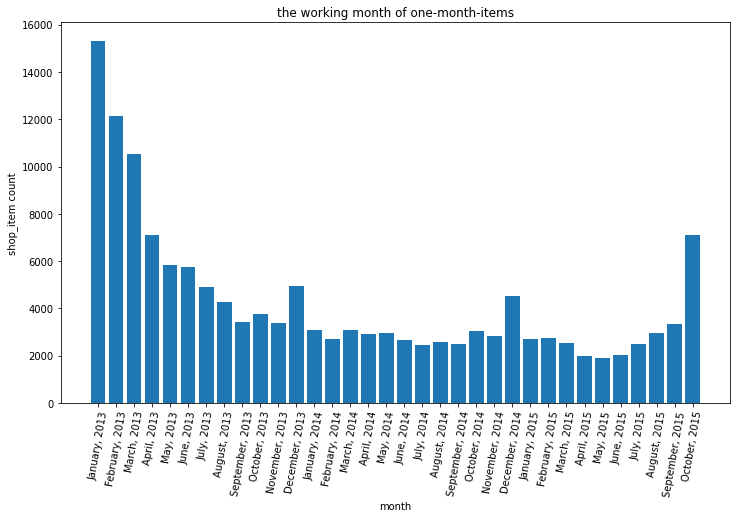

In [41]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=all_months.date_block_num,
       height=sales_interval[sales_interval.date_interval == 1].groupby('max_date').date_interval.count()
      )
ax.set_xlabel('month')
ax.set_ylabel('shop_item count')
ax.set_title('the working month of one-month-items')
ax.set_xticks(ticks=all_months.date_block_num)
ax.set_xticklabels(all_month_names, rotation=80)
plt.show()

And many of such "shop_items" were bere being sold very far. So these "shop_items" have small posibility to be sold in the next month.

Here the count of months during that the items were being sold.

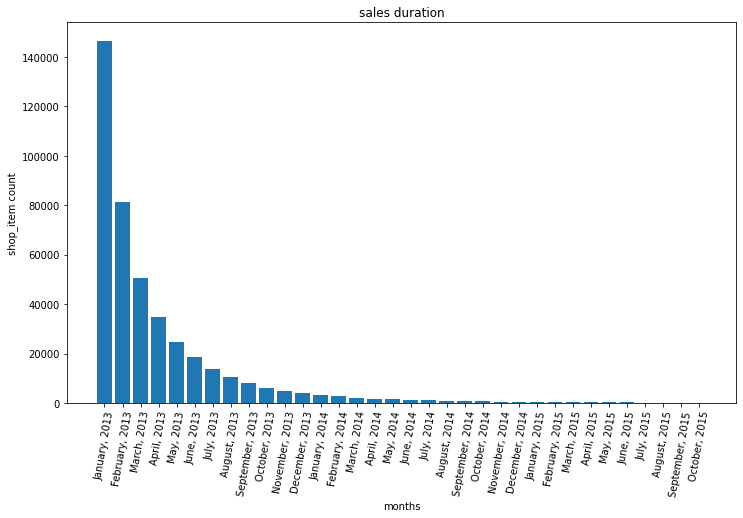

In [42]:
sales_month_count = sales_train.groupby(['shop_id', 'item_id']).date_block_num.nunique()
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=all_months.date_block_num,
       height=sales_month_count.value_counts().sort_index()
      )
ax.set_xlabel('months')
ax.set_ylabel('shop_item count')
ax.set_title('sales duration')
ax.set_xticks(ticks=all_months.date_block_num)
ax.set_xticklabels(all_month_names, rotation=80)
plt.show()

So there are many "shop_items" that were being sold for a few months (not necessarily consecutive). It is obviously that this histogram is not the same as the histogram for *date_interval*. It means that there are "shop_items" with "empty" months (when the selling count is 0). It can be explained by the absence of this item in a storage or that this item has rarely selling. In the first case we should ignore such "empty" months if they are not regular. In the second case we should take into consideration that the selling count is small among all the months

Let's take a look at monthly sellings.

In [43]:
month_info = sales_train.groupby(['shop_id', 'item_id', 'date_block_num']).agg({'item_cnt_day': 'sum'})

In [44]:
print(np.percentile(month_info, q=0.07))
print(np.percentile(month_info, q=99.25))

0.0
20.0


In [45]:
month_info.describe()

,item_cnt_day
count,1.609124e+06
mean,2.267200e+00
std,8.649882e+00
min,-2.200000e+01
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.253000e+03


There are some outliers. But almost all values are between 0 and 20. In task description it's said that the target value will be clipped to interval (0, 20). So when creating monthly sellings dataset the target feature is clipped to interval (0, 20).

## Total sales count

The total sales count for each month

In [46]:
groupped = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
total_count = groupped.groupby('date_block_num').agg({'item_cnt_day': 'sum'}).reset_index()

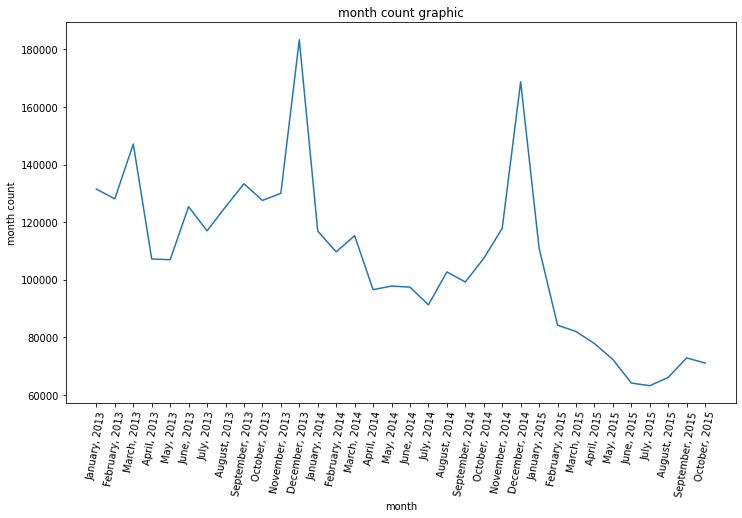

In [47]:
plt.figure(figsize=(12, 7))
plt.plot(total_count.date_block_num, total_count.item_cnt_day)
plt.xlabel('month')
plt.ylabel('month count')
plt.title('month count graphic')
plt.xticks(ticks=total_count.date_block_num, labels=all_month_names, rotation=80)
plt.show()

There are pikes corresponds to decembers of 2013 and 2014. It can be explained with the high demand before the New Year.

In [48]:
sales_train.merge(items.drop(columns='item_name'), on='item_id')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40
2935845,01.10.2015,33,25,7903,12198.0,1.0,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,64


In [49]:
category_count = sales_train.merge(items.drop(columns='item_name'), on='item_id').groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_day': 'sum'}).reset_index()

In [50]:
category_count.head()

,date_block_num,item_category_id,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,2,1390.0
3,0,3,440.0
4,0,4,251.0


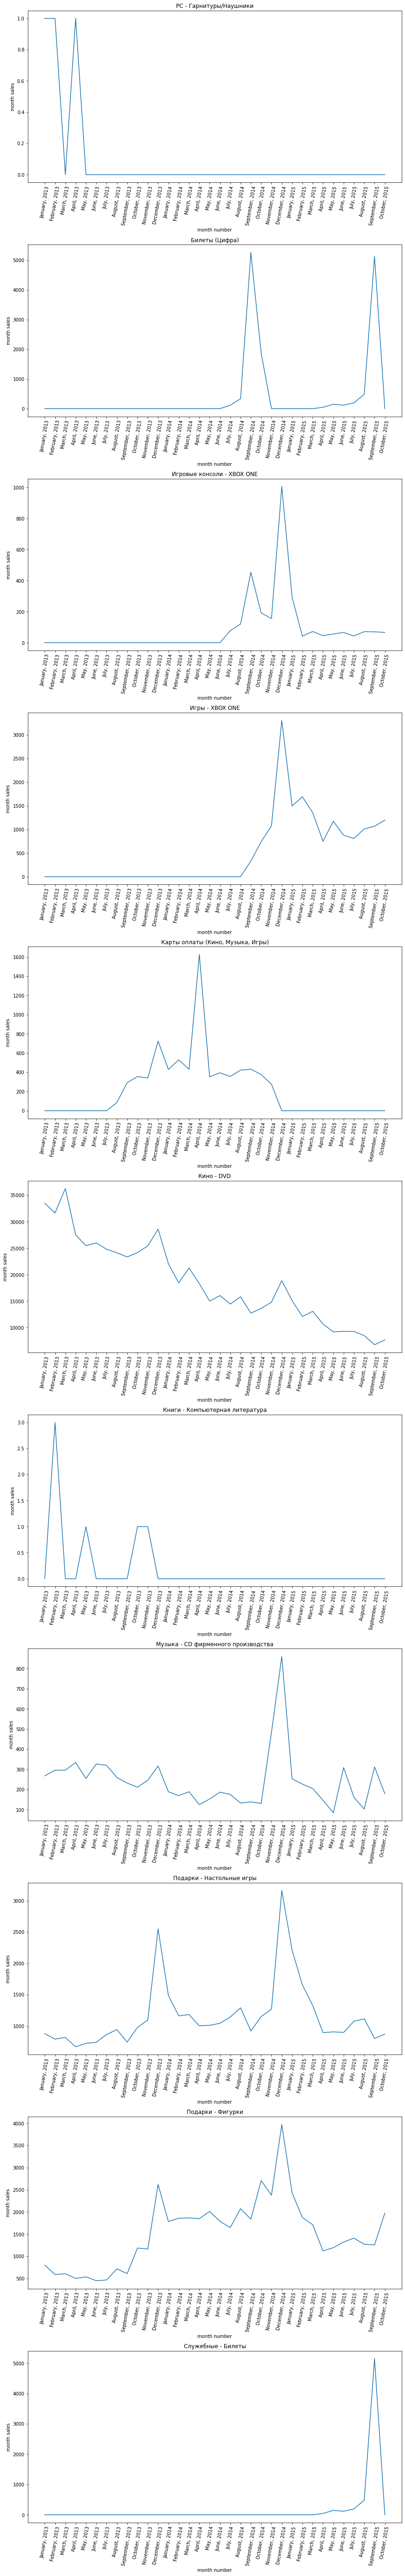

In [51]:
categories_to_show = item_categories.item_category_id[::8]

fig, axes = plt.subplots(
    categories_to_show.size, 1,
    figsize=(12, 7 * categories_to_show.size),
    constrained_layout=True
)

for i, item_cat_id in enumerate(categories_to_show):
    ax = axes[i]
    sample_category_count = category_count[category_count.item_category_id == item_cat_id]\
                            .drop(columns='item_category_id')\
                            .merge(all_months, on='date_block_num', how='right')\
                            .fillna(0)
    
    ax.plot(sample_category_count.date_block_num, sample_category_count.item_cnt_day)
    ax.set_title(item_categories.loc[item_cat_id].item_category_name)
    ax.set_xlabel('month number')
    ax.set_ylabel('month sales')
    ax.set_xticks(ticks=all_months.date_block_num)
    ax.set_xticklabels(all_month_names, rotation=80)
plt.show()

Graphics for some of categories has pikes corresponding to decembers as it was for total sales:

| normal categories |
|---|
| Игровые консоли - XBOX ONE |
| Игры - XBOX ONE |
| Музыка - CD фирменного производства |
| Подарки - Настольные игры |
| Подарки - Фигурки |

Some of others was being sold for a few months:

| rare categories |
|---|
| PC - Гарнитуры/Наушники |
 | Билеты (Цифра) |
 | Игровые консоли - XBOX ONE |
 | Игры - XBOX ONE |
 | Книги - Компьютерная литература |
 | Служебные - Билеты |

These categories that have enough months in history behave differently: month sales for 'Кино - DVD' category has downtrend, for 'Подарки - Фигурки' category - uptrend. The 'Билеты (Цифра)' category has pikes corresponding to septembers, not to decembers. So it is impossible to generalize all the categories by the type of trend or the pike months.

# Transformation

## shops

In [52]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


There are pairs of ids for the same shops:(0, 57), (1, 58), (10, 11). So in the rows where *shop_id* equals 0, 1 or 10 this feature will be changed to 57, 58 or 11 respectively.  
Let's split *shop_name* into  new features as it was told in general desciption of the table.

In [53]:
from string import punctuation

At first all strings must be normalized - they must contain only alphanumeric characters in lower case

In [54]:
norm_shop_names = shops.shop_name.str.replace(f'[{punctuation}]', '').str.lower()

In [55]:
norm_shop_names

0                       якутск орджоникидзе 56 фран
1                        якутск тц центральный фран
2                                    адыгея тц мега
3                       балашиха трк октябрькиномир
4                            волжский тц волга молл
5                              вологда трц мармелад
6                           воронеж плехановская 13
7                              воронеж трц максимир
8                         воронеж трц ситипарк град
9                                 выездная торговля
10                         жуковский ул чкалова 39м
11                        жуковский ул чкалова 39м²
12                               интернетмагазин чс
13                                казань тц бехетле
14                            казань тц паркхаус ii
15                               калуга трц xxi век
16                                   коломна тц рио
17                      красноярск тц взлетка плаза
18                               красноярск тц июнь
19          

As there are shop names that doesn't match the pattern written in general description, they should be changed to this pattern or they should be handled by the other way. But they don't have other pattern. E.g. 'воронеж плехановская 13' doen't contain the type of shop although it consists of 3 words. 'интернетмагазин чс', 'выездная торговля' consist of 2 words but the first contains the name 'чс' while the second doesn't contain the one.

In [56]:
shop_city_type_name_features = norm_shop_names.str.extract('(\S+) (\S+) (.+)').rename(columns={0: 'city', 1: 'shop_type', 2: 'shop_name'})
shop_city_type_name_features.drop([0, 1, 10], inplace=True)
shop_city_type_name_features.loc[6] = ('воронеж', '', 'плехановская 13')
shop_city_type_name_features.loc[9] = ('', '', 'выездная торговля')
shop_city_type_name_features.loc[11] = ('жуковский', '', 'ул. чкалова 39м')
shop_city_type_name_features.loc[12] = ('', 'интернетмагазин', 'чс')
shop_city_type_name_features.loc[20] = ('москва', '', 'распродажа')
shop_city_type_name_features.loc[46] = ('сергиев посад', 'тц', '7я')
shop_city_type_name_features.loc[55] = ('', 'цифровой склад', '1сонлайн')
shop_city_type_name_features.loc[57] = ('якутск', '', 'орджоникидзе 56')
shop_city_type_name_features

,city,shop_type,shop_name
2,адыгея,тц,мега
3,балашиха,трк,октябрькиномир
4,волжский,тц,волга молл
5,вологда,трц,мармелад
6,воронеж,,плехановская 13
7,воронеж,трц,максимир
8,воронеж,трц,ситипарк град
9,,,выездная торговля
11,жуковский,,ул. чкалова 39м
12,,интернетмагазин,чс


We can encode each feature by LabelEncoder.

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
new_shop_features = {}
for col in shop_city_type_name_features.columns:
    le = LabelEncoder()
    shop_city_type_name_features[col] = le.fit_transform(shop_city_type_name_features[col])
    new_shop_features[col] = pd.DataFrame({col: le.classes_})\
                                .reset_index().rename(columns={'index': f'{col}_id'})

Encoded features are stored in their own tables.

In [59]:
city = new_shop_features['city']
shop_name = new_shop_features['shop_name']
shop_type = new_shop_features['shop_type']

All the cities

In [60]:
city.head()

,city_id,city
0,0,
1,1,адыгея
2,2,балашиха
3,3,волжский
4,4,вологда


All the shop types

In [61]:
shop_type.head()

,shop_type_id,shop_type
0,0,
1,1,интернетмагазин
2,2,магазин
3,3,мтрц
4,4,тк


All the shop names

In [62]:
shop_name.head()

,shop_name_id,shop_name
0,0,1сонлайн
1,1,7я
2,2,xl3
3,3,xxi век
4,4,альтаир


In [63]:
city.to_csv('data/city.csv', index=False)
shop_name.to_csv('data/shop_name.csv', index=False)
shop_type.to_csv('data/shop_type.csv', index=False)

So we have ***shops*** table with encoded shop city, type and name. When merging with the ***sales_train*** table these features will be encoded with target encoding.

In [64]:
shops_1 = shop_city_type_name_features.reset_index().rename(columns={'index': 'shop_id'})

In [65]:
shops_1.head()

,shop_id,city,shop_type,shop_name
0,2,1,7,23
1,3,2,5,31
2,4,3,7,12
3,5,4,6,22
4,6,5,0,36


Let's change the type of features to *int8*. It decreases the memory size of this table and the ***sales_train*** table after merging with this table.

In [66]:
shops_1 = shops_1.astype('int8')

In [67]:
shops_1.to_csv('data/shops_1.csv', index=False)

## item_categories

As it was told in general description, *item_category_name* can be splitted into 2 features. So let's extract these features.  
At first this feature (as its type is string) must be normalized. But here hyphen will not be removed. It is needed to split the string into two features.

In [68]:
punctuation_but_hyphen = punctuation.replace('-', '')
item_categories.item_category_name = item_categories.item_category_name.str.replace(f'[{punctuation_but_hyphen}]', '').str.lower()

In [69]:
start_item_categories = pd.read_csv('data/item_categories.csv', index_col='item_category_id')

As there are some categories not of this pattern, we will assume that they have no supercategory. We will assume that for all but one category 'служебные'. We will assume that it is supercategory so let's change this row.

In [70]:
item_categories.loc[79] = 'служебные - '

In [71]:
super_and_simple_categories = item_categories.item_category_name.str.extract('((.*) - )?(.*)')\
                                                .rename(columns={1: 'super_category', 2: 'category'})

There are nans in table. They indicate that the category name contains only one category. So in this case the super category is ''.

In [72]:
super_and_simple_categories = super_and_simple_categories.drop(columns=[0]).fillna('')

In [73]:
super_and_simple_categories.head()

,super_category,category
0,pc,гарнитурынаушники
1,аксессуары,ps2
2,аксессуары,ps3
3,аксессуары,ps4
4,аксессуары,psp


We can encode the new features via LabelEncoder.

In [74]:
cat_new_features = {}
for col in super_and_simple_categories.columns:
    le = LabelEncoder()
    super_and_simple_categories[col] = le.fit_transform(super_and_simple_categories[col])
    cat_new_features[col] = pd.DataFrame({col: le.classes_})\
                                .reset_index().rename(columns={'index': f'{col}_id'})

In [75]:
super_category = cat_new_features['super_category']
category = cat_new_features['category']

All the super categories.

In [76]:
super_category.head()

,super_category_id,super_category
0,0,
1,1,pc
2,2,аксессуары
3,3,игровые консоли
4,4,игры


All the simple categories.

In [77]:
category.head()

,category_id,category
0,0,
1,1,1спредприятие 8
2,2,blu-ray
3,3,blu-ray 3d
4,4,blu-ray 4k


In [78]:
super_category.to_csv('data/super_category.csv', index=False)
category.to_csv('data/category.csv', index=False)

So we have ***item_categories*** table with encoded shop city, type and name. When merging with the ***sales_train*** table these features will be encoded with target encoding.

In [79]:
item_categories_1 = super_and_simple_categories.reset_index().rename(columns={'index': 'item_category_id'})

As in the ***shops_1*** table, the feature types are changed to *int8* to decrease the memory size.

In [80]:
item_categories_1 = item_categories_1.astype('int8')

In [81]:
item_categories_1.head()

,item_category_id,super_category,category
0,0,1,32
1,1,2,12
2,2,2,13
3,3,2,14
4,4,2,16


## sales_train

It is the information about all the items in encoded form.

In [82]:
full_items_info = items.drop(columns=['item_name']).merge(item_categories_1, how='left', on='item_category_id')

In [83]:
full_items_info.head()

,item_id,item_category_id,super_category,category
0,0,40,9,7
1,1,76,13,34
2,2,40,9,7
3,3,40,9,7
4,4,40,9,7


As it was written above all *shop_id*s in equals to 0, 1 or 10 are changed to 57, 58, 11 respectively.

In [84]:
sales_train.shop_id.replace(to_replace=[0, 1, 10], value=[57, 58, 11], inplace=True)

Then I will add some features to ***test*** table to concatenate it with ***train_sales*** table. It is needed to do feature engineering for all data. Also it is easier to create lag features when all data is in one table.

In [85]:
test = pd.read_csv('data/test.csv', index_col='ID')
test['date_block_num'] = 34
test = test[['date_block_num', 'shop_id', 'item_id']]
test['item_cnt_day'] = 0
test.shop_id.replace(to_replace=[0, 1, 10], value=[57, 58, 11], inplace=True)

Here the table train + test is expanded by adding rows for each month such that all rows of each month contain info about all (shop, item) elements if at least one of them is "active" (there are rows with this value). The table is expanded because train dataset has the same structure.

In [86]:
all_sales = pd.concat([sales_train, test], ignore_index=True)
all_sales = all_sales.groupby(['shop_id', 'item_id', 'date_block_num']).agg({'item_cnt_day': 'sum'}).reset_index()

train = []

for i in all_sales['date_block_num'].unique():
    all_shop = all_sales.loc[all_sales['date_block_num']==i, 'shop_id'].unique()
    all_item = all_sales.loc[all_sales['date_block_num']==i, 'item_id'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['date_block_num', 'shop_id', 'item_id']
train = pd.DataFrame(np.vstack(train), columns=idx_features)

all_sales = train.merge(all_sales, how='left', on=idx_features)
all_sales.fillna(value=0, inplace=True)

Reducing the memory size.

In [87]:
del train
del all_shop
del all_item
del sales_train

In [88]:
all_sales = all_sales.astype({
    'date_block_num': 'int8',
    'shop_id': 'int8',
    'item_id': 'int16',
    'item_cnt_day': 'int8'
})

As all predicted values are clipped with the interval (0, 20) I clip the target value in the dataset.  
Also I rename the feature **item_cnt_day** because it is the month count.

In [89]:
all_sales.item_cnt_day = all_sales.item_cnt_day.clip(0, 20)
all_sales.rename(columns={'item_cnt_day': 'item_cnt'}, inplace=True)

Merging with ***full_items_info*** and ***shops_1*** tables. So the table ***all_sales*** contains all the information about items and shops.

In [90]:
all_sales = all_sales\
                    .merge(full_items_info, how='left', on='item_id')\
                    .merge(shops_1, how='left', on='shop_id')
all_sales.head()

,date_block_num,shop_id,item_id,item_cnt,item_category_id,super_category,category,city,shop_type,shop_name
0,0,2,27,1,19,4,13,1,7,23
1,0,2,33,1,37,9,2,1,7,23
2,0,2,317,1,45,10,25,1,7,23
3,0,2,438,1,45,10,25,1,7,23
4,0,2,471,2,49,10,42,1,7,23


In [91]:
all_sales.item_category_id = all_sales.item_category_id.astype('int8')
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128050 entries, 0 to 11128049
Data columns (total 10 columns):
 #   Column            Dtype
---  ------            -----
 0   date_block_num    int8 
 1   shop_id           int8 
 2   item_id           int16
 3   item_cnt          int8 
 4   item_category_id  int8 
 5   super_category    int8 
 6   category          int8 
 7   city              int8 
 8   shop_type         int8 
 9   shop_name         int8 
dtypes: int16(1), int8(9)
memory usage: 201.6 MB


It is the option to output the information about columns. I increase the maximum count to 50.

In [92]:
pd.set_option('display.max_info_columns', 50)

Saving the train and test datasets as datasets without any lag features and features encoded via target encoding.

In [93]:
test_1 = test.drop(columns=['item_cnt_day'])\
                    .merge(all_sales, on=['date_block_num', 'shop_id', 'item_id'])[all_sales.drop(columns='item_cnt').columns]
test_1.to_csv('data/test_without_lags_and_target_encoding.csv', index_label='ID')
all_sales[all_sales.date_block_num < 34].drop(columns='item_cnt').to_csv('data/X_without_lags_and_target_encoding.csv', index=False)
all_sales[all_sales.date_block_num < 34][['item_cnt']].to_csv('data/y_without_lags_and_target_encoding.csv', index=False)

Let's add lag_features.  
This is the function that create lag features and returns the expanded table.

In [94]:
def lag_feature(df, lag, col, merge_cols):        
    temp = df[merge_cols + [col]]
    temp = temp.groupby(merge_cols).agg({f'{col}':'first'}).reset_index()
    temp.columns = merge_cols + [f'{col}_lag{lag}']
    temp['date_block_num'] += lag
    df = pd.merge(df, temp, on=merge_cols, how='left')
    df[f'{col}_lag{lag}'] = df[f'{col}_lag{lag}'].fillna(0).astype('int8')
    return df

I create 12 lag features to take into consideration the sales a year ago.

In [95]:
for i in range(1, 13):
    all_sales = lag_feature(all_sales, i, 'item_cnt', ['date_block_num', 'shop_id', 'item_id'])

I delete rows corresponding to the first year in history because they don't have enough prehistory.

In [96]:
all_sales = all_sales[all_sales.date_block_num >= 12]

In [97]:
all_sales.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639294 entries, 365175 to 11128049
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   date_block_num    6639294 non-null  int8 
 1   shop_id           6639294 non-null  int8 
 2   item_id           6639294 non-null  int16
 3   item_cnt          6639294 non-null  int8 
 4   item_category_id  6639294 non-null  int8 
 5   super_category    6639294 non-null  int8 
 6   category          6639294 non-null  int8 
 7   city              6639294 non-null  int8 
 8   shop_type         6639294 non-null  int8 
 9   shop_name         6639294 non-null  int8 
 10  item_cnt_lag1     6639294 non-null  int8 
 11  item_cnt_lag2     6639294 non-null  int8 
 12  item_cnt_lag3     6639294 non-null  int8 
 13  item_cnt_lag4     6639294 non-null  int8 
 14  item_cnt_lag5     6639294 non-null  int8 
 15  item_cnt_lag6     6639294 non-null  int8 
 16  item_cnt_lag7     6639294 non-

Saving the train and test datasets as dataset with lag features but without features encoded via target encoding.

In [98]:
test_2 = test.drop(columns=['item_cnt_day'])\
                    .merge(all_sales, on=['date_block_num', 'shop_id', 'item_id'])[all_sales.drop(columns='item_cnt').columns]
test_2.to_csv('data/test_without_target_encoding.csv', index_label='ID')
all_sales[all_sales.date_block_num < 34].drop(columns='item_cnt').to_csv('data/X_without_target_encoding.csv', index=False)
all_sales[all_sales.date_block_num < 34][['item_cnt']].to_csv('data/y_without_target_encoding.csv', index=False)

There are columns that can be encoded via target encoding. They are in variable *encoded_cols*. The variable *new_encoded_cols* contains new names of features.

In [99]:
encoded_cols = ['shop_id', 'item_id', 'item_category_id', 'super_category', 'category', 'city', 'shop_type', 'shop_name']
new_encoded_cols = list(map(lambda col: 'encoded_' + col, encoded_cols))
target_encoder = TargetEncoder(cols=encoded_cols)

As table **all_sales** contains test data that are used for predicting, the target encoder must fit on the dataset without test data.

In [100]:
target_encoder.fit(all_sales[all_sales.date_block_num < 33], all_sales[all_sales.date_block_num < 33].item_cnt)

TargetEncoder(cols=['shop_id', 'item_id', 'item_category_id', 'super_category',
                    'category', 'city', 'shop_type', 'shop_name'])

Here is encoding the features and converting the type of new features to 'float32' to reduce the memory size.

In [101]:
encoded_features = target_encoder.transform(all_sales)[encoded_cols]
all_sales[new_encoded_cols] = encoded_features.astype('float32')
all_sales.head()

,date_block_num,shop_id,item_id,item_cnt,item_category_id,super_category,category,city,shop_type,shop_name,...,item_cnt_lag11,item_cnt_lag12,encoded_shop_id,encoded_item_id,encoded_item_category_id,encoded_super_category,encoded_category,encoded_city,encoded_shop_type,encoded_shop_name
365175,17,2,27,1,19,4,13,1,7,23,...,0,0,0.142528,0.031250,0.597889,0.618967,0.559280,0.142528,0.301755,0.274314
365176,17,2,76,1,37,9,2,1,7,23,...,0,0,0.142528,0.466077,0.161711,0.204633,0.161711,0.142528,0.301755,0.274314
365177,17,2,77,1,40,9,7,1,7,23,...,0,0,0.142528,1.058978,0.239700,0.204633,0.239700,0.142528,0.301755,0.274314
365178,17,2,485,1,73,13,1,1,7,23,...,2,0,0.142528,1.901852,0.378996,0.172854,0.378996,0.142528,0.301755,0.274314
365179,17,2,791,1,73,13,1,1,7,23,...,1,3,0.142528,0.491837,0.378996,0.172854,0.378996,0.142528,0.301755,0.274314


In [102]:
del encoded_features

Saving the train and test datasets as datasets that contain lag features and features encoded via target encoding.

In [103]:
test_3 = test.drop(columns=['item_cnt_day'])\
                    .merge(all_sales, on=['date_block_num', 'shop_id', 'item_id'])[all_sales.drop(columns='item_cnt').columns]
test_3.to_csv('data/test_full.csv', index_label='ID')
all_sales[all_sales.date_block_num < 34].drop(columns='item_cnt').to_csv('data/X_full.csv', index=False)
all_sales[all_sales.date_block_num < 34][['item_cnt']].to_csv('data/y_full.csv', index=False)